### 시계열 분해 : 시계열을 몇 가지 성분을 나누어 이해하는 작업 (※ trend, sesonality, cycle)
🕝 시계열 분해 역사

    (1) Classical Decomposition : 전통적인 시계열 분해, MA 구할 시 앞뒤 데이터 삭제, Robust하지 못함

    (2) X11 : 미국 인구 조사국/캐나다 통계청 개발, 양 끝점 삭제 해결, 휴일 효과 등 캘린더 고려, 갑작스런 변화에 유연하게 대응

    (3) SEATS : 스페인 은행 개발, 분기별, 월별 데이터에서만 작동

    (4) STL(Sesonal and Trend decompostion usinf Loess)
    -  다양한 상황에서 사용할 수 있는 강력한 시계열 분해 기법
    -  SEAT와 X11과 다르게 월별, 분기별 데이터 포함 어떤 종류의 계절성도 다룰 수 있음
    -  계절적인 성분이 시간에 따라 변해도 Hyper parameter를 통해 반영할 수 있음
    -  Trend와 Sesonality를 제거하고 남는 Residual을 활용하여 시계열 데이터 이상 탐지

    [good] 분기별, 월별, 일별 분해 모두 가능
    [good] MA(Moving Avg) 방식이 아니기 때문에 데이터 유실 없음
    [good] 돌발스런 이상치에 대해 추세, 주기에 영향을 미치지 않음
    [bad] 캘린더 데이터를 반영하지 못함, 일별 데이터로 변환하여 넣어줘야함
    [bad] 덧셈 분해 기능만 제공

- 덧셈 분해(additive decomposition)
    - y = S + T + R



    Trend가 일정함에 따라 변동폭이 동일하면 덧셈 분해(additive decomposition)
    (※ Trend와 Seasonal의 관계가 없다.)

- 곱셈 분해 (multiplicative decomposition)
    - y = S x T x R

    Trend가 상승함에 따라 변동폭이 변화하면 곱셈 분해(multiplicative decomposition)    
    (※ Trend변화에 따라 Seasonal의 관계가 있다.)

- 사용방법

    # !pip install statsmodels==0.12.1 (※ 오류 발생시 version 교체)
    # from statsmodels.tsa.seasonal import STL
    # 주기(Seasonal의) 결정
    # Seasonal 및 Trend 제거 후 Residual 추출
    # Residual 정규성 검증 및 3-sigma rule 적용 이상 탐지

In [1]:
import pandas as pd
co2 = [315.58,316.39,316.79,317.82,318.39,318.22,316.68,315.01,314.02,313.55,315.02,315.75,316.52,317.10,317.79,319.22,320.08,319.70,318.27,315.99,314.24,314.05,315.05,316.23,316.92,317.76,318.54,319.49,320.64,319.85,318.70,316.96,315.17,315.47,316.19,317.17,318.12,318.72,319.79,320.68,321.28,320.89,319.79,317.56,316.46,315.59,316.85,317.87,318.87,319.25,320.13,321.49,322.34,321.62,319.85,317.87,316.36,316.24,317.13,318.46,319.57,320.23,320.89,321.54,322.20,321.90,320.42,318.60,316.73,317.15,317.94,318.91,319.73,320.78,321.23,322.49,322.59,322.35,321.61,319.24,318.23,317.76,319.36,319.50,320.35,321.40,322.22,323.45,323.80,323.50,322.16,320.09,318.26,317.66,319.47,320.70,322.06,322.23,322.78,324.10,324.63,323.79,322.34,320.73,319.00,318.99,320.41,321.68,322.30,322.89,323.59,324.65,325.30,325.15,323.88,321.80,319.99,319.86,320.88,322.36,323.59,324.23,325.34,326.33,327.03,326.24,325.39,323.16,321.87,321.31,322.34,323.74,324.61,325.58,326.55,327.81,327.82,327.53,326.29,324.66,323.12,323.09,324.01,325.10,326.12,326.62,327.16,327.94,329.15,328.79,327.53,325.65,323.60,323.78,325.13,326.26,326.93,327.84,327.96,329.93,330.25,329.24,328.13,326.42,324.97,325.29,326.56,327.73,328.73,329.70,330.46,331.70,332.66,332.22,331.02,329.39,327.58,327.27,328.30,328.81,329.44,330.89,331.62,332.85,333.29,332.44,331.35,329.58,327.58,327.55,328.56,329.73,330.45,330.98,331.63,332.88,333.63,333.53,331.90,330.08,328.59,328.31,329.44,330.64,331.62,332.45,333.36,334.46,334.84,334.29,333.04,330.88,329.23,328.83,330.18,331.50,332.80,333.22,334.54,335.82,336.45,335.97,334.65,332.40,331.28,330.73,332.05,333.54,334.65,335.06,336.32,337.39,337.66,337.56,336.24,334.39,332.43,332.22,333.61,334.78,335.88,336.43,337.61,338.53,339.06,338.92,337.39,335.72,333.64,333.65,335.07,336.53,337.82,338.19,339.89,340.56,341.22,340.92,339.26,337.27,335.66,335.54,336.71,337.79,338.79,340.06,340.93,342.02,342.65,341.80,340.01,337.94,336.17,336.28,337.76,339.05,340.18,341.04,342.16,343.01,343.64,342.91,341.72,339.52,337.75,337.68,339.14,340.37,341.32,342.45,343.05,344.91,345.77,345.30,343.98,342.41,339.89,340.03,341.19,342.87,343.74,344.55,345.28,347.00,347.37,346.74,345.36,343.19,340.97,341.20,342.76,343.96,344.82,345.82,347.24,348.09,348.66,347.90,346.27,344.21,342.88,342.58,343.99,345.31,345.98,346.72,347.63,349.24,349.83,349.10,347.52,345.43,344.48,343.89,345.29,346.54,347.66,348.07,349.12,350.55,351.34,350.80,349.10,347.54,346.20,346.20,347.44,348.67,
400, 450, 460]
co2 = pd.Series(co2, index=pd.date_range("1-1-2022", periods=len(co2), freq="M"), name="CO2")
co2.head()

2022-01-31    315.58
2022-02-28    316.39
2022-03-31    316.79
2022-04-30    317.82
2022-05-31    318.39
Freq: M, Name: CO2, dtype: float64

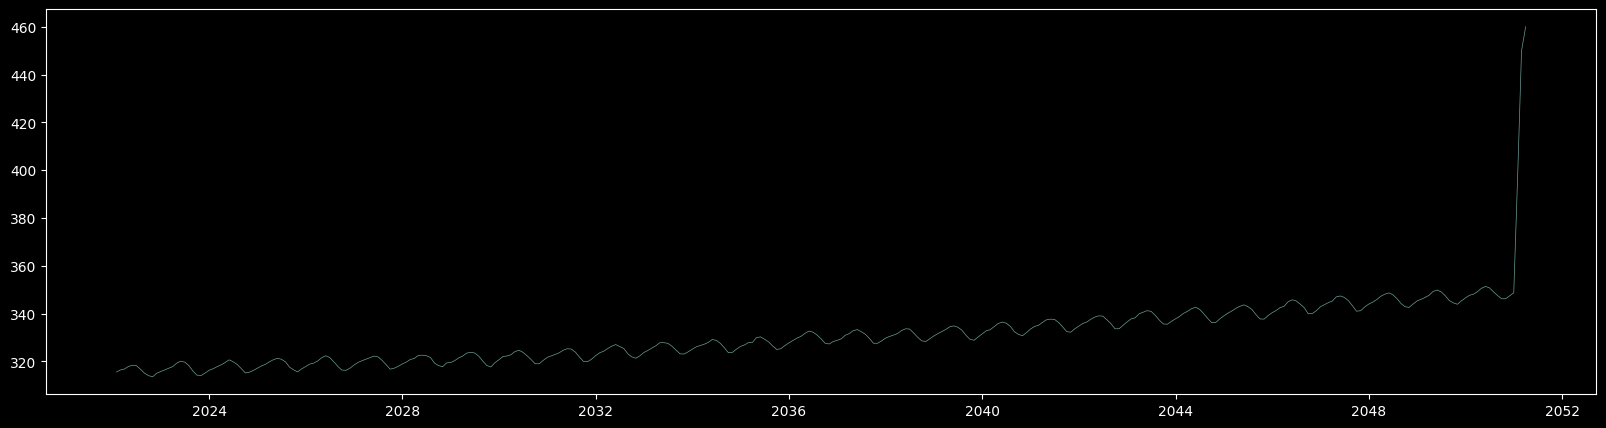

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

# ▶ Plot
fig = plt.figure(figsize=(20,5))
plt.plot(co2, linewidth=0.5, alpha=0.75, label='Close');

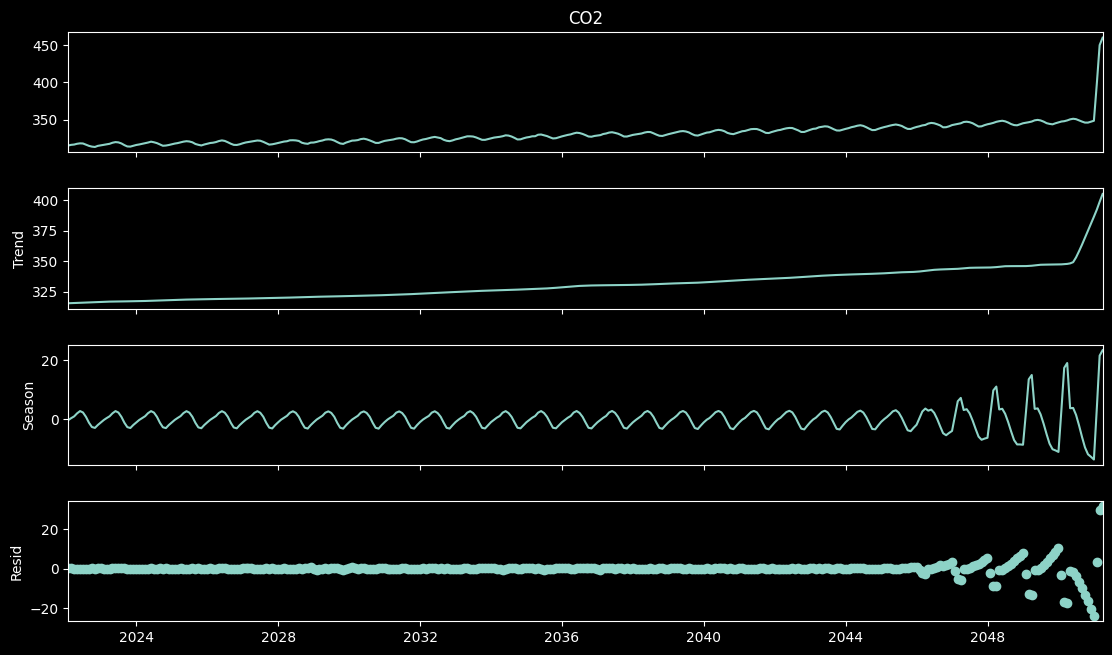

In [3]:
from statsmodels.tsa.seasonal import STL
# ▶ Odd num : seasonal = 13(연도별) / seasonal = 5(분기별) / seasonal = 7(주별)
stl = STL(co2, seasonal=13)
res = stl.fit()
fig = res.plot()
fig.set_size_inches(12, 7)

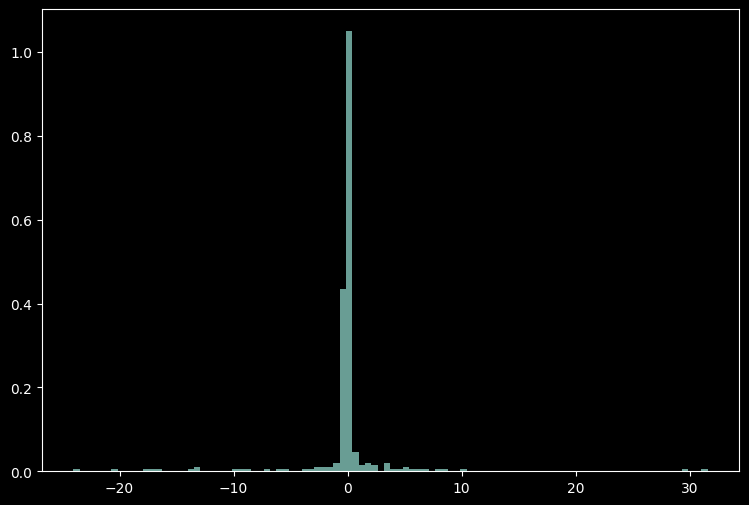

In [4]:
# ▶ Residual(잔차)의 분포 확인
fig, ax = plt.subplots(figsize=(9,6))
_ = plt.hist(res.resid, 100, density=True, alpha=0.75)

In [5]:
# ▶ Ztest를 통한 정규성 검증(Nomality Test)
# ▶ Ztest : 정규분포를 가정하며, 추출된 표본이 동일 모집단(정규분포)에 속하는지 가설 검증하기 위해 사용 (※ p-value가 0.05 이상이면 정규성을 따름)
from statsmodels.stats.weightstats import ztest
r = res.resid.values
st, p = ztest(r)
print(st,p)

-0.6506146684262828 0.5152952591180103


In [6]:
# ▶ 평균과 표준편차 출력
mu, std = res.resid.mean(), res.resid.std()
print("평균:", mu, "표준편차:", std)

# 3-sigma(표준편차)를 기준으로 이상치 판단
print("이상치 갯수:", len(res.resid[(res.resid>mu+3*std)|(res.resid<mu-3*std)]))
# 이상치 갯수: 10

평균: -0.13473483767402747 표준편차: 3.879802434937742
이상치 갯수: 10


In [7]:
# ▶ 이상 데이터 확인
co2[res.resid[(res.resid>mu+3*std)|(res.resid<mu-3*std)].index]

2049-02-28    346.72
2049-03-31    347.63
2050-02-28    348.07
2050-03-31    349.12
2050-09-30    346.20
2050-10-31    346.20
2050-11-30    347.44
2050-12-31    348.67
2051-02-28    450.00
2051-03-31    460.00
Name: CO2, dtype: float64

In [8]:
co2_df = co2.reset_index()
print(co2_df[co2_df['index'] == '2049-02-28'].index)
print(co2_df[co2_df['index'] == '2049-03-31'].index)
print(co2_df[co2_df['index'] == '2050-02-28'].index)
print(co2_df[co2_df['index'] == '2050-03-31'].index)
print(co2_df[co2_df['index'] == '2050-09-30'].index)
print(co2_df[co2_df['index'] == '2050-10-31'].index)
print(co2_df[co2_df['index'] == '2050-11-30'].index)
print(co2_df[co2_df['index'] == '2050-12-31'].index)
print(co2_df[co2_df['index'] == '2051-02-28'].index)
print(co2_df[co2_df['index'] == '2051-03-31'].index)

Int64Index([325], dtype='int64')
Int64Index([326], dtype='int64')
Int64Index([337], dtype='int64')
Int64Index([338], dtype='int64')
Int64Index([344], dtype='int64')
Int64Index([345], dtype='int64')
Int64Index([346], dtype='int64')
Int64Index([347], dtype='int64')
Int64Index([349], dtype='int64')
Int64Index([350], dtype='int64')


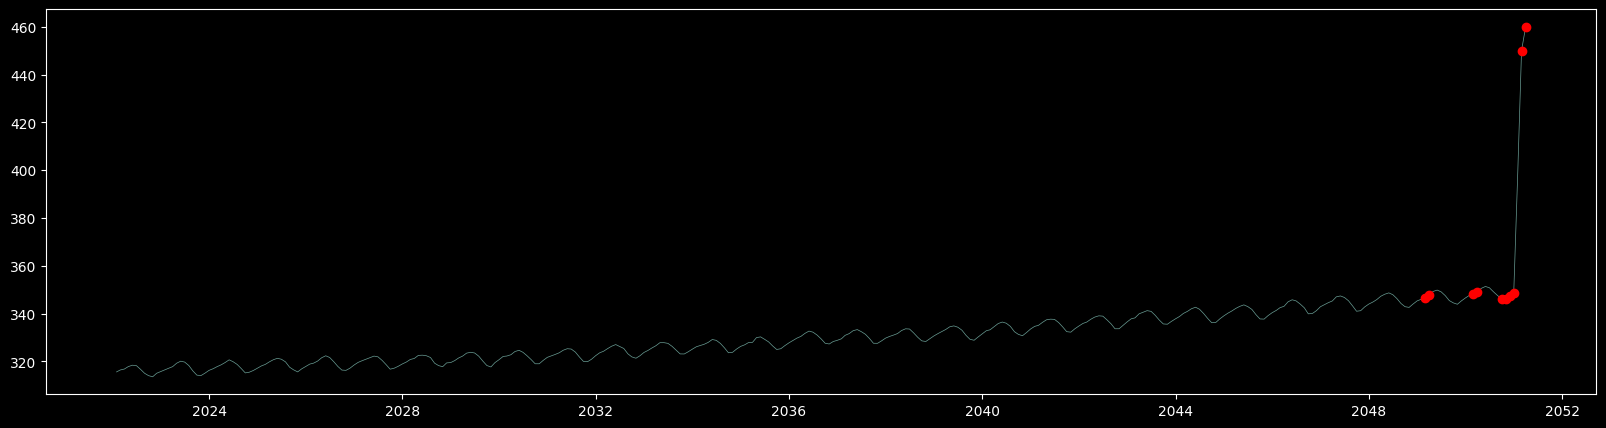

In [9]:
# ▶ Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])
fig = plt.figure(figsize=(20,5))

plt.plot(co2, linewidth=0.5, alpha=0.75, label='Close');
plt.plot(co2, 'or', markevery=[325, 326, 337, 338, 344, 345, 346, 347, 349, 350]);

# Holt-winters
: https://otexts.com/fppkr/holt-winters.html

    # STL은 강력한 시계열 분해 방법이지만, 지속적으로 증가하는(multiplicative) 이상 Point 탐지에 대해서 약점을 가지고 있음
    # 가까운 데이터는 가중치를 높게 할당하고 오래전 데이터는 가중치를 작게 할당 하여 미래의 x값을 예측
    # exponential smoothing(지수평활) 기법
    # Holt-Winters 알고리즘은 단순한 exponential smoothing 뿐만 아니라 trend 속성과 seasonality 속성이 추가
    # Holt-Winters를 활용해 시계열 데이터를 예측하고, brutlag 알고리즘 활용 신뢰구간을 설정하여 이상 탐지
    # Holt-Winters 모델은 단순하면서도 널리 활용되어지는 시계열 분석도구로서 많은 시계열예측의 기준모델로서 쓰이고 있음

    # [good] 장기간 예측이 가능
    # [good] Hyper parameter 조정을 통해 이상 허용 오차에 대해 유연하게 대응
    # [good] 연산량이 적음, 큰 데이터 세트에 대해서 리소스 절약, 자동화 가능
    # [good] 계절성을 고려한 이상 탐지 가능
    # [good] 시계열 데이터가 비정상적이면서 추세 및 계절성이 있을 경우 사용가능한 모델
    # [bad] 단변량 데이터에 대해서만 적용 가능, 상관관계 고려 X
    # [bad] 계절성이 없는 데이터에 대해서는 성능 저조
    # [bad] 변동이 적은 계절성 데이터에 대해서는 민감하게 탐지할 우려

    # from statsmodels.tsa.holtwinters import ExponentialSmoothing
    # ES(Exponential Smoothing)을 통해 전체 데이터셋을 학습하고 예측
    # Brutlag Algorithm 활용 신뢰구간 설정
    # 신뢰구간 활용 이상 Point 탐지

In [10]:
import pandas as pd
co2 = [315.58,316.39,316.79,317.82,318.39,318.22,316.68,315.01,314.02,313.55,315.02,315.75,316.52,317.10,317.79,319.22,320.08,319.70,318.27,315.99,314.24,314.05,315.05,316.23,316.92,317.76,318.54,319.49,320.64,319.85,318.70,316.96,315.17,315.47,316.19,317.17,318.12,318.72,319.79,320.68,321.28,320.89,319.79,317.56,316.46,315.59,316.85,317.87,350, 318.87,319.25,320.13,321.49,322.34,321.62,319.85,317.87,316.36,316.24,317.13,318.46,319.57,320.23,320.89,321.54,322.20,321.90,320.42,318.60,316.73,317.15,317.94,318.91,319.73,320.78,321.23,322.49,322.59,322.35,321.61,319.24,318.23,317.76,319.36,319.50,320.35,321.40,322.22,323.45,323.80,323.50,322.16,320.09,318.26,317.66,319.47,320.70,322.06,322.23,322.78,324.10,324.63,323.79,322.34,320.73,319.00,318.99,320.41,321.68,322.30,322.89,323.59,324.65,325.30,325.15,323.88,321.80,319.99,319.86,320.88,322.36,323.59,324.23,325.34,326.33,327.03,326.24,325.39,323.16,321.87,321.31,322.34,323.74,324.61,325.58,326.55,327.81,327.82,327.53,326.29,324.66,323.12,323.09,324.01,325.10,326.12,326.62,327.16,327.94,329.15,328.79,327.53,325.65,323.60,323.78,325.13,326.26,326.93,327.84,327.96,329.93,330.25,329.24,328.13,326.42,324.97,325.29,326.56,327.73,328.73,329.70,330.46,331.70,332.66,332.22,331.02,329.39,327.58,327.27,328.30,328.81,329.44,330.89,331.62,332.85,333.29,332.44,331.35,329.58,327.58,327.55,328.56,329.73,330.45,330.98,331.63,332.88,333.63,333.53,331.90,330.08,328.59,328.31,329.44,330.64,331.62,332.45,333.36,334.46,334.84,334.29,333.04,330.88,329.23,328.83,330.18,331.50,332.80,333.22,334.54,335.82,336.45,335.97,334.65,332.40,331.28,330.73,332.05,333.54,334.65,335.06,336.32,337.39,337.66,337.56,336.24,334.39,332.43,332.22,333.61,334.78,335.88,336.43,337.61,338.53,339.06,338.92,337.39,335.72,333.64,333.65,335.07,336.53,337.82,338.19,339.89,340.56,341.22,340.92,339.26,337.27,335.66,335.54,336.71,337.79,338.79,340.06,340.93,342.02,342.65,341.80,340.01,337.94,336.17,336.28,337.76,339.05,340.18,341.04,342.16,343.01,343.64,342.91,341.72,339.52,337.75,337.68,339.14,340.37,341.32,342.45,343.05,344.91,345.77,345.30,343.98,342.41,339.89,340.03,341.19,342.87,343.74,344.55,345.28,347.00,347.37,346.74,345.36,343.19,340.97,341.20,342.76,343.96,344.82,345.82,347.24,348.09,348.66,347.90,346.27,344.21,342.88,342.58,343.99,345.31,345.98,346.72,347.63,349.24,349.83,349.10,347.52,345.43,344.48,343.89,345.29,346.54,347.66,360.07,349.12,350.55,351.34,350.80,349.10,320.54,346.20,346.20,347.44,348.67]
co2 = pd.Series(co2, index=pd.date_range("1-1-2022", periods=len(co2), freq="M"), name="CO2")
co2 = pd.DataFrame(co2)
co2.head()

,CO2
2022-01-31,315.58
2022-02-28,316.39
2022-03-31,316.79
2022-04-30,317.82
2022-05-31,318.39


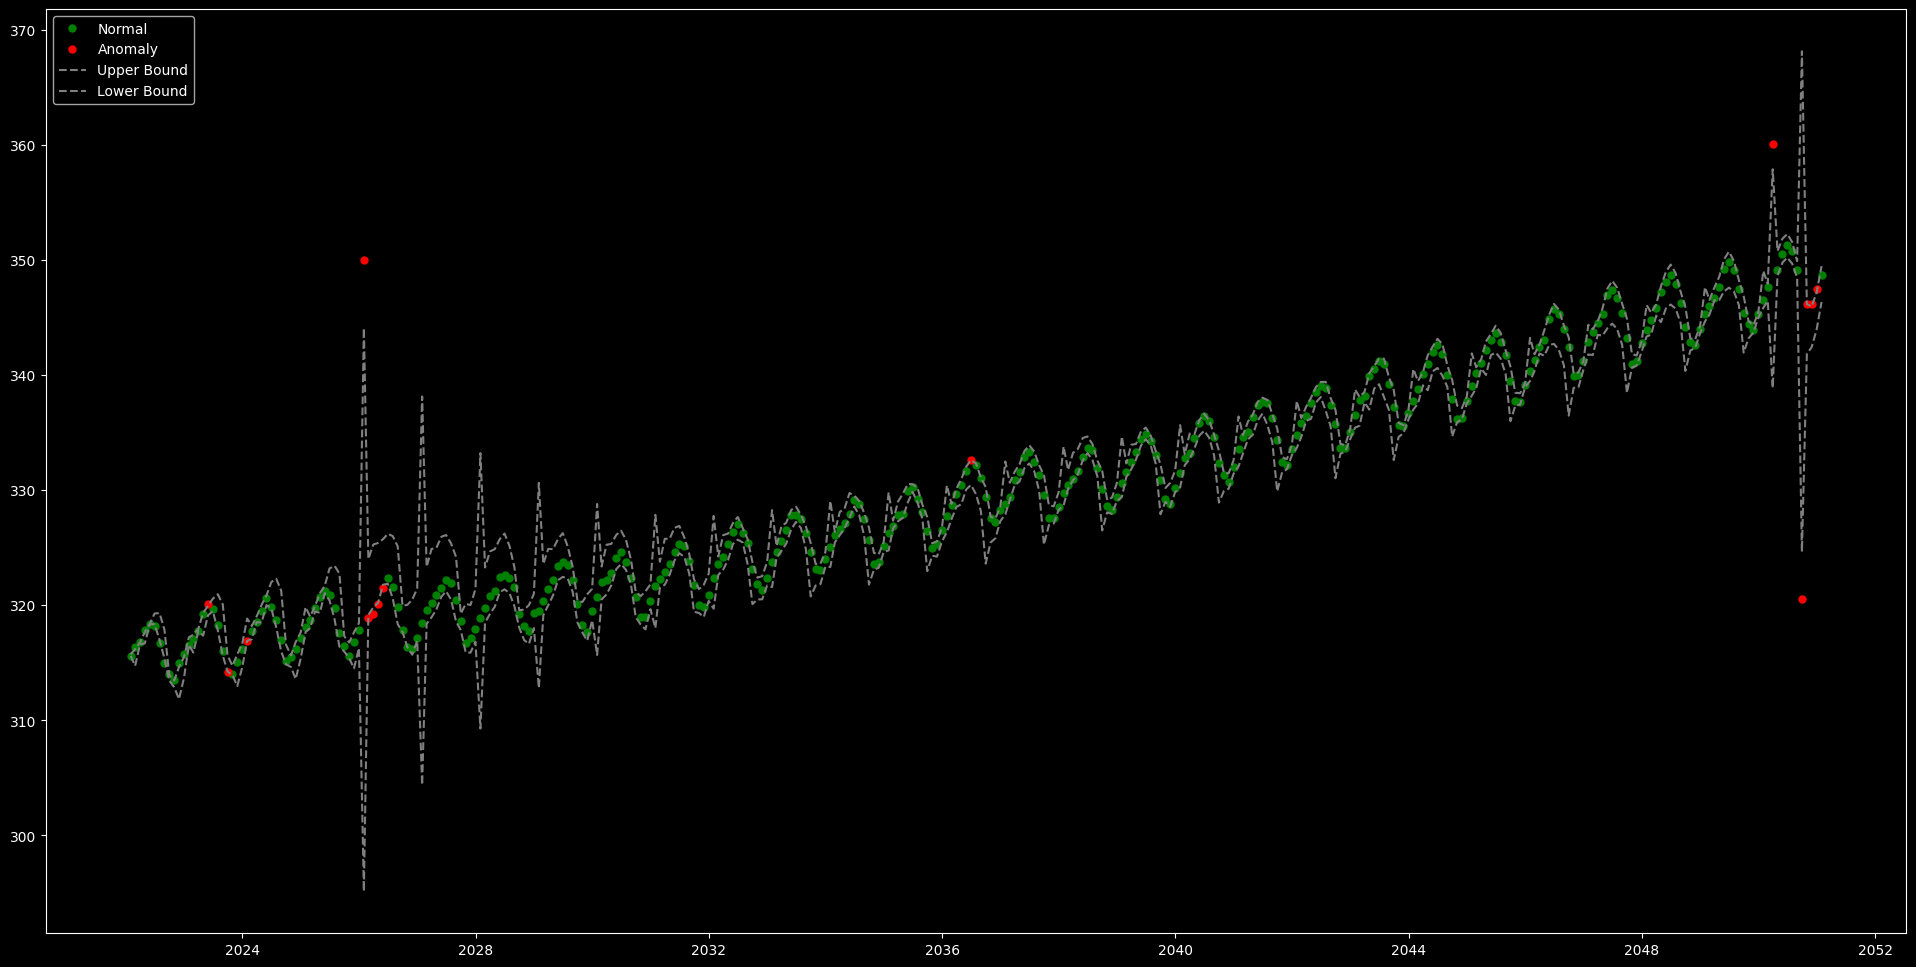

In [11]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

temp_df = co2
train_df = co2

# ▶ ES 모델을 만들어 학습하고 전체 데이터에 대해 예측한다.
# ▶ additive는 경향성이 일정함을 의미하고, 경향성 변동폭이 있을 때는 multiplicative를 사용
model = ExponentialSmoothing(
    train_df, trend='additive', seasonal='additive').fit()

prediction = model.predict(
    start=temp_df.index[0], end=temp_df.index[-1])

"""Brutlag Algorithm"""
PERIOD = 12        # The given time series has seasonal_period=12
GAMMA = 0.4        # the seasonility component
SF = 1.96          # brutlag scaling factor for the confidence bands.
UB = []            # upper bound or upper confidence band
LB = []            # lower bound or lower confidence band

# ▶ 실측치와 예측치를 비교하는 자료구조
difference_array = []
dt = []
difference_table = {"actual": temp_df, "predicted": prediction, "difference": difference_array, "UB": UB, "LB": LB}

# ▶ brutlag 알고리즘
# ▶ 12개월 이전의 실측/결측 차이에 0.6, 이번달 차이에 0.4 정도의 가중치를 주어 저장
for i in range(len(prediction)):
    diff = temp_df.iloc[i]-prediction.iloc[i]
    if i < PERIOD:
        dt.append(GAMMA*abs(diff))
    else:
        dt.append(GAMMA*abs(diff) + (1-GAMMA)*dt[i-PERIOD])

# ▶ 저장된 실측/결측 차이를 예측치의 95% 신뢰구간(1.96)으로 반영하여 Upper/Lower Band 계산
    difference_array.append(diff)
    UB.append(prediction[i]+SF*dt[i])
    LB.append(prediction[i]-SF*dt[i])

"""Classification of data points as either normal or anomaly"""
normal = []
normal_date = []
anomaly = []
anomaly_date = []

# 신뢰구간을 벗어나는지 판단하여 normal, anomaly 결정
for i in range(len(temp_df.index)):
    if ((UB[i] <= temp_df.iloc[i]).bool() or (LB[i] >= temp_df.iloc[i]).bool()) and i > PERIOD:
        anomaly_date.append(temp_df.index[i])
        anomaly.append(temp_df.iloc[i][0])
    else:
        normal_date.append(temp_df.index[i])
        normal.append(temp_df.iloc[i][0])

anomaly = pd.DataFrame({"date": anomaly_date, "value": anomaly})
anomaly.set_index('date', inplace=True)
normal = pd.DataFrame({"date": normal_date, "value": normal})
normal.set_index('date', inplace=True)

# plotting
plt.figure(figsize=(24,12))
plt.plot(normal.index, normal, 'o', color='green', markersize=5)
plt.plot(anomaly.index, anomaly, 'o', color='red', markersize=5)
plt.plot(temp_df.index, UB, linestyle='--', color='grey')
plt.plot(temp_df.index, LB, linestyle='--', color='grey')
plt.legend(['Normal', 'Anomaly', 'Upper Bound', 'Lower Bound'])
plt.show()

In [12]:
# 이상 데이터 확인
anomaly

,value
date,
2023-05-31,320.08
2023-09-30,314.24
2024-01-31,316.92
2026-01-31,350.00
2026-02-28,318.87
2026-03-31,319.25
2026-04-30,320.13
2026-05-31,321.49
2036-06-30,332.66
